-----------------------------------------------------------------
# **CREDIT CARD FRAUD DETECTION**
----------------------------------------------------------

**Problem statement** - Explore the dataset, which includes anonymized credit card transactions, and perform data preprocessing, feature engineering, and exploratory data analysis. Using various machine learning algorithms like logistic regression, decision trees, or ensemble methods, build models to predict fraudulent transactions.
And also evaluate the performance of these models using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "kabilansathiyamurthy" # username from the json file
os.environ['KAGGLE_KEY'] = "6c8f82e5188682305dcf4b9cc5539240" # key from the json fil
!kaggle datasets download -d mlg-ulb/creditcardfraud

 96% 63.0M/66.0M [00:03<00:00, 30.4MB/s]
100% 66.0M/66.0M [00:03<00:00, 22.4MB/s]


In [2]:
!unzip '/content/creditcardfraud.zip'

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


------------------------------
**-- Approach to Credit card fraud detection --**
1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
      1. Missing values: impute all missing values using Mean,Median and Mode
      2. Inconistent values: Replace all inconsistence with consistent values
      3. Outliers: Transform or let algorithm deal
4. Data Visualization
5. Data Analysis
      1. Uni-Variant Analysis(Mean,Median and Mode,Skewness)
      2. Bi-Varient Analysis(Correlation,Covariance,Chi-square test)
      3. Multi-Varient Analysis
          1. Regression:Not a regression problem
              1. Classification:
                 1.KNN
                 2.Logistic reg
                 3.Random forest
                 4.GB BOOST(XGB)
                 5.SVM
                 6.Naive Bayes
      4.Compare results
------------------------------------------------------------------
    

---------------------------
#IMPORT NECESSARY LIBRARIES
---------------------------

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

-----------------------------
#LOAD AND AUDIT DATA
-----------------------------

In [4]:
data = pd.read_csv("/content/creditcard.csv")

In [5]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print("No of Rows:",data.shape[0])
print("No of Columns:",data.shape[1])

No of Rows: 284807
No of Columns: 31


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


-----------------------------------------
#DATA PREPARATION AND DATA TRANSFORMATION
-----------------------------------------

## CHECKING FOR MISSING VALUES

<Axes: >

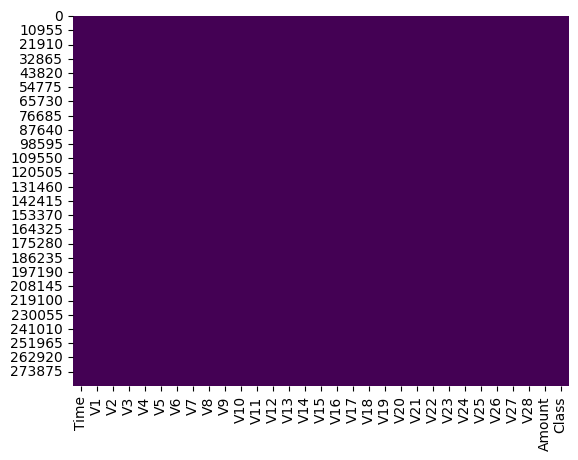

In [14]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* There is no missing values

## CHECKING FOR SKEWNESS OF DATA

In [15]:
data.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

-------------------------
# DATA VISUALIZATION
-------------------------

<Axes: >

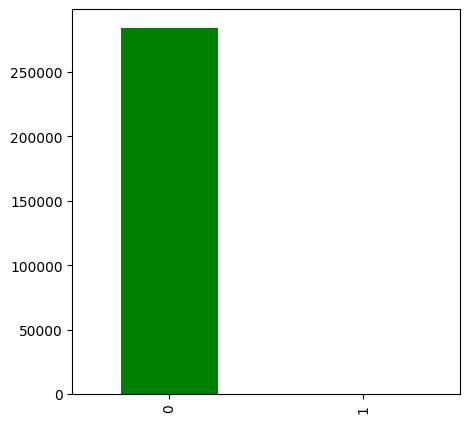

In [38]:
#Class count
data['Class'].value_counts().plot(kind='bar', color=['green', 'yellow'],figsize=(5, 5))


-- The dataset is highly imbalanced
* 0 - Genuine Transaction
* 1 - Fraudulent Transaction

* A classification data set with skewed class proportions is called imbalanced.A class with large proportion is majority class and small proportion is minority class.If the data is imbalanced , then the model fails to identify the minority

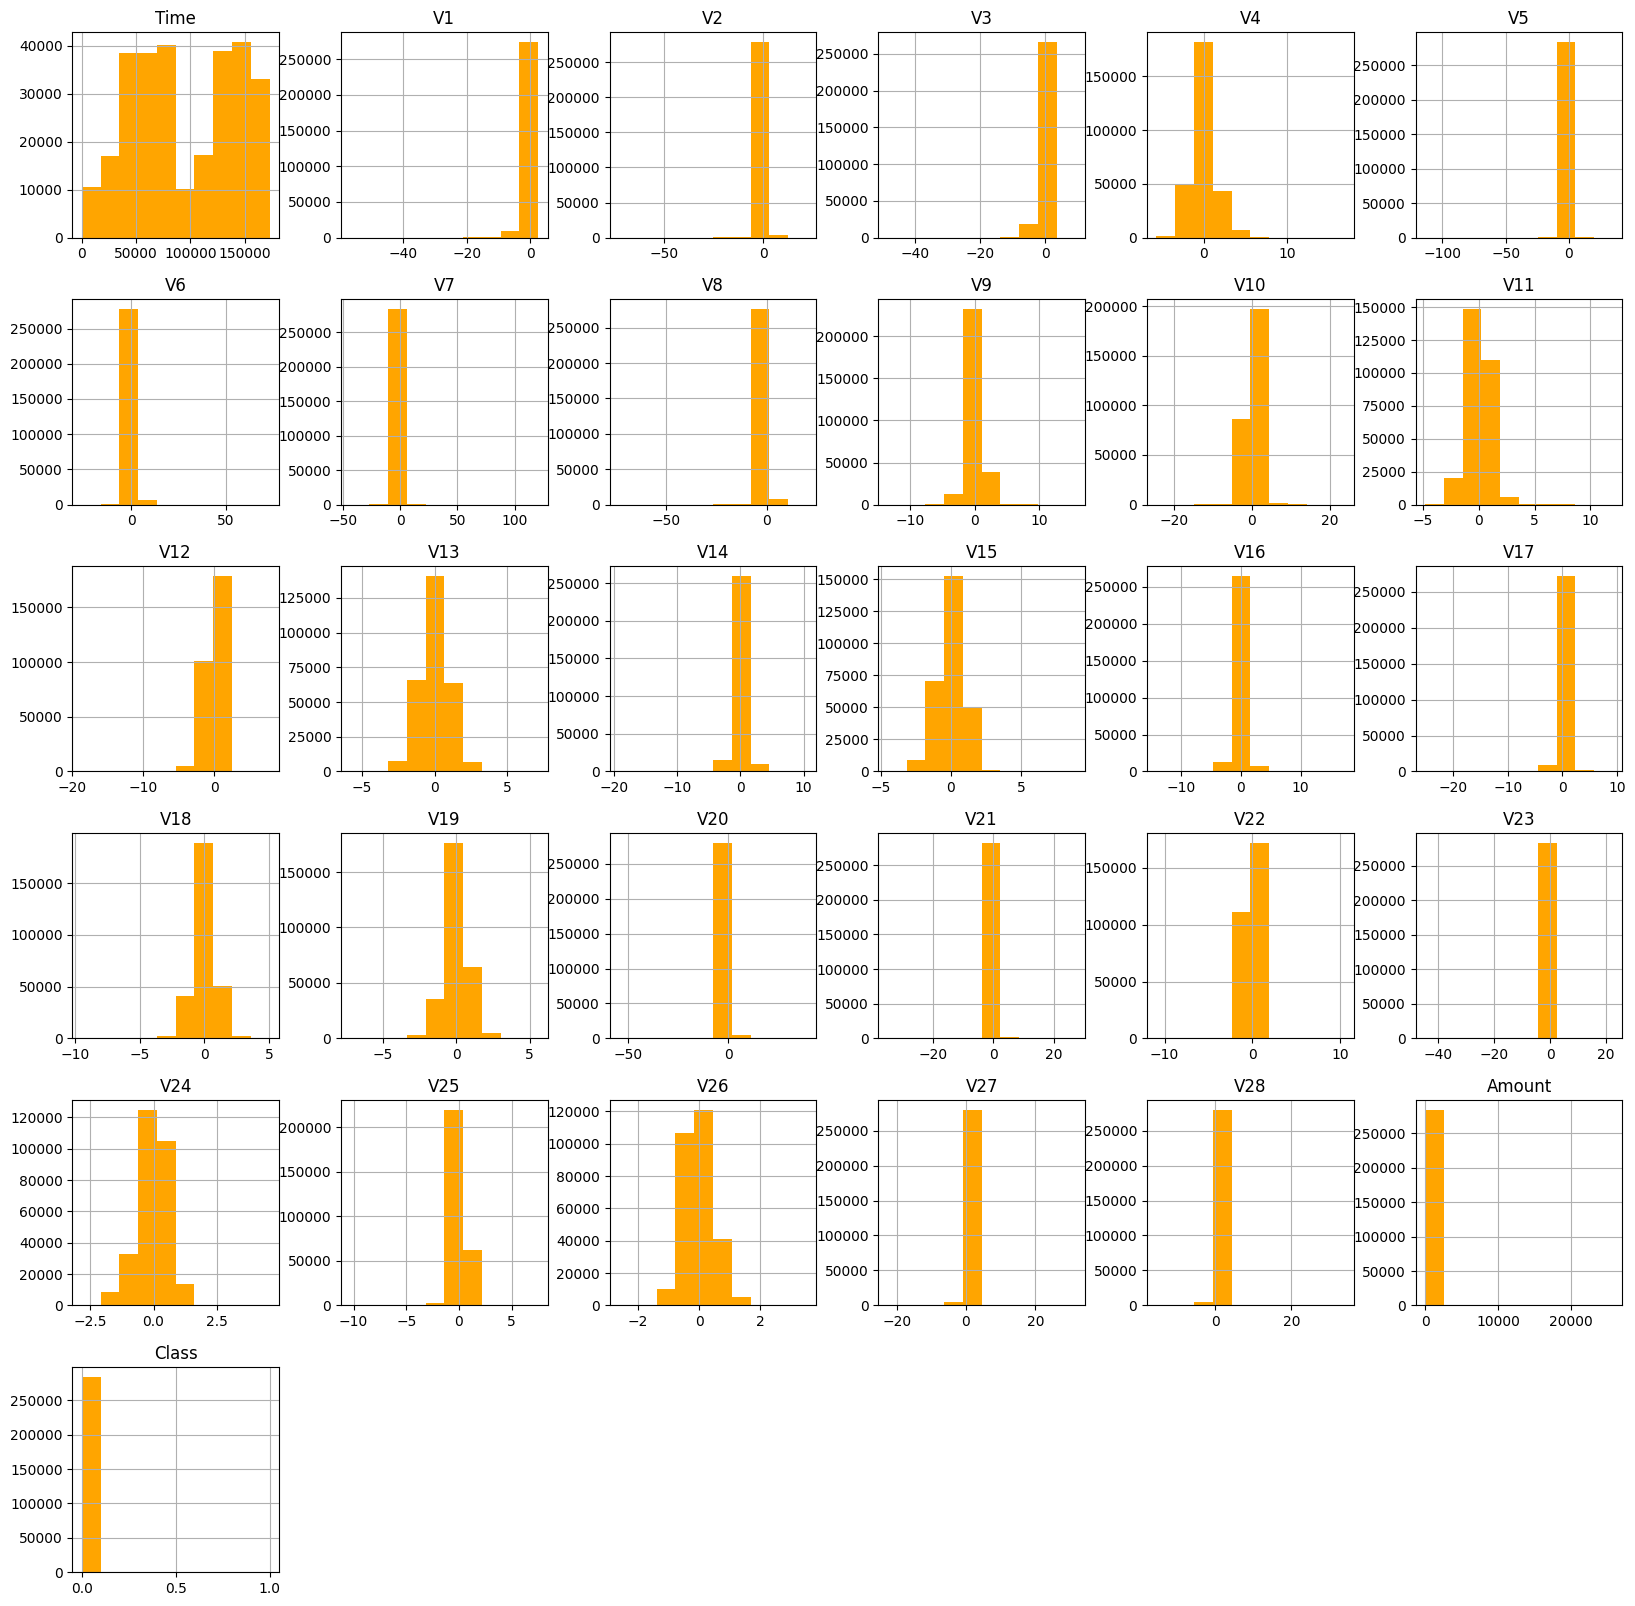

In [94]:
data.hist(figsize=(20,20),color='orange')
plt.show()

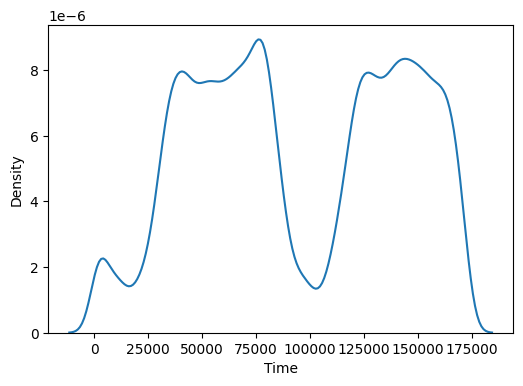

In [50]:
# Distribution of our dataset in Time
plt.figure(figsize=(6,4))
sns.kdeplot(data['Time'])
plt.show()

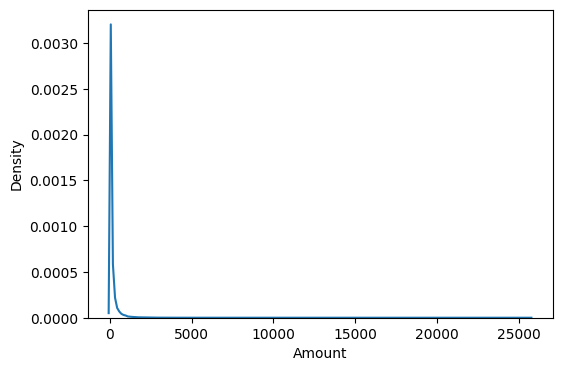

In [51]:
# Distribution of our dataset in Amount
plt.figure(figsize=(6,4))
sns.kdeplot(data['Amount'])
plt.show()

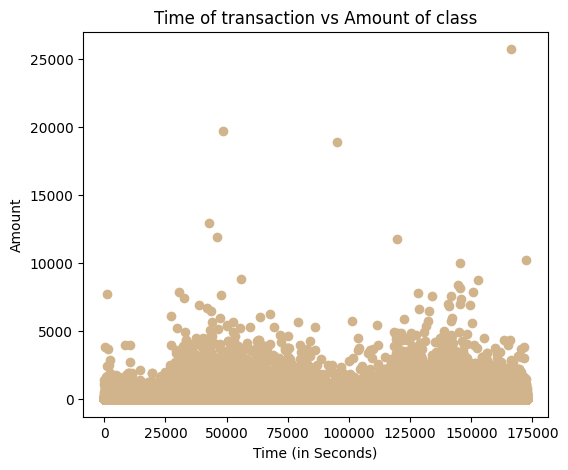

In [41]:
#Scatter plot for time vs amount
plt.figure(figsize=(6, 5))
plt.scatter(data.Time,data.Amount, c='tan')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.title('Time of transaction vs Amount of class')
plt.show()

-------------------
# SPLITTING THE DATASET
-----------------

In [52]:
x = data.drop('Class',axis=1)
y = data['Class']

## BALANCING THE DATASET USING SMOTE

* SMOTE is an oversampling technique where the synthetic samples are generated
for the minority class.

In [53]:
from imblearn.over_sampling import SMOTE
x = x.loc[:,~x.columns.duplicated()]
sm = SMOTE(random_state=42)
x_res, y_res= sm.fit_resample(x, y,)

<Axes: title={'center': 'Class'}>

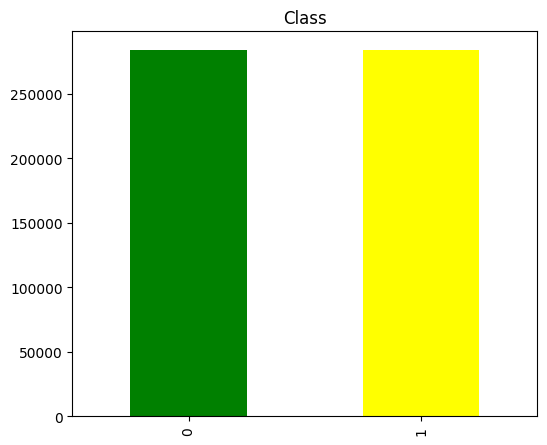

In [56]:
y_res.value_counts().plot(kind='bar', title='Class', color=['green', 'yellow'],figsize=(6,5))


* Data is Balanced now

## SPLITTING INTO TRAIN AND TEST

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(454904, 30)
(113726, 30)
(454904,)
(113726,)


## STANDARDIZATION

* This code is performing feature scaling using the StandardScaler to standardize the range of values of the data in both the training and test sets. This step is used in  machine learning to improve model performance.*

In [61]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

---------------------
#MODEL BUILDING
---------------------

In [76]:
def acc_report(actual,predicted):
  acc_score=accuracy_score(actual,predicted)

  conf_matrix=confusion_matrix(actual,predicted)
  labels= ['Valid', 'Fraud']
  plt.figure(figsize=(3, 3))
  sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

  clas_rep=classification_report(actual,predicted)
  print("Accuracy :",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

* This is a user defind function for reporting the accuracy, confusion matrix, and classification report for a given set of actual and predicted values. This can be useful for evaluating the performance of a machine learning models.*

## LOGISTIC REGRESSION
-----

In [67]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
preds_lr_train=lr.predict(x_train)
preds_lr_test=lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 0.98
[[225621   1944]
 [  7061 220278]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    227565
           1       0.99      0.97      0.98    227339

    accuracy                           0.98    454904
   macro avg       0.98      0.98      0.98    454904
weighted avg       0.98      0.98      0.98    454904



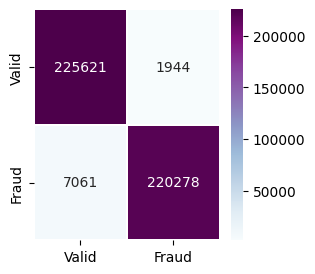

In [78]:
acc_report(y_train,preds_lr_train)

Accuracy : 0.98
[[56252   498]
 [ 1698 55278]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



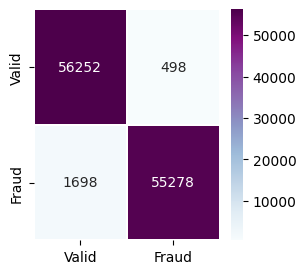

In [79]:
acc_report(y_test,preds_lr_test)

##RANDOM FOREST
-----

In [69]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
preds_rf_train=rf.predict(x_train)
preds_rf_test=rf.predict(x_test)

Accuracy : 1.0
[[227565      0]
 [     0 227339]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



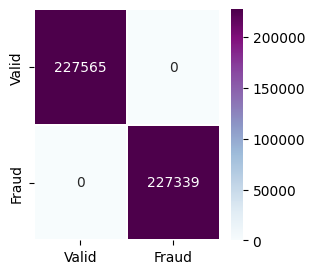

In [80]:
acc_report(y_train,preds_rf_train)


Accuracy : 1.0
[[56739    11]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



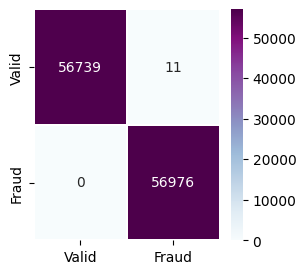

In [81]:
acc_report(y_test,preds_rf_test)

## XG BOOST
-----

In [83]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
preds_xgb_train=xgb.predict(x_train)
preds_xgb_test=xgb.predict(x_test)

Accuracy : 1.0
[[227565      0]
 [     0 227339]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



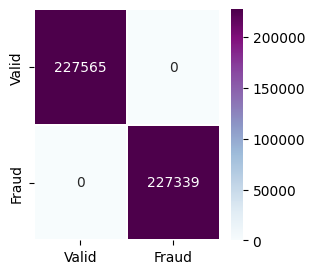

In [85]:
acc_report(y_train,preds_xgb_train)

Accuracy : 1.0
[[56734    16]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



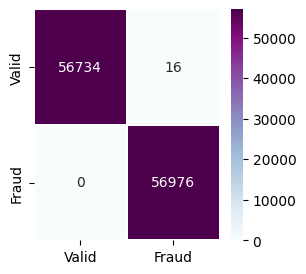

In [86]:
acc_report(y_test,preds_xgb_test)

## NAIVE BAYES
-----------

In [89]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
preds_gnb_train=gnb.predict(x_train)
preds_gnb_test=gnb.predict(x_test)

Accuracy : 0.92
[[222456   5109]
 [ 29499 197840]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    227565
           1       0.97      0.87      0.92    227339

    accuracy                           0.92    454904
   macro avg       0.93      0.92      0.92    454904
weighted avg       0.93      0.92      0.92    454904



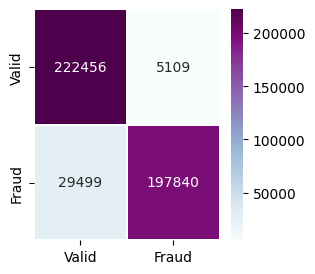

In [90]:
acc_report(y_train,preds_gnb_train)

Accuracy : 0.92
[[55433  1317]
 [ 7291 49685]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     56750
           1       0.97      0.87      0.92     56976

    accuracy                           0.92    113726
   macro avg       0.93      0.92      0.92    113726
weighted avg       0.93      0.92      0.92    113726



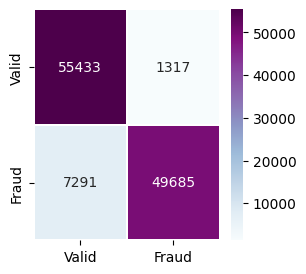

In [91]:
acc_report(y_test,preds_gnb_test)

------------
# CONCLUSION
-------------

* The Random forest and XGBoost performs well on this data giving the highest Accuracy score 100 percentage with low bias and low variance

----------------------
------------------------